## Make necessary imports

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

In [3]:
!pip install lux
import lux

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.2 MB/s eta 0:00:00
  Created wheel for lux: filename=lux-0.5.1-py3-none-any.whl size=11962 sha256=e91c345bc06c64c261eeb86a362d7ca6940c1b69a050d9811dda1942a6934cdd
  Stored in directory: /root/.cache/pip/wheels/e8/23/56/ad9393d57959f25ca5a7d6e55cb280cd1f9affbc987e2fbd26
  Created wheel for lux-api: filename=lux_api-0.5.1-py3-none-any.whl size=185603 sha256=073ff65a494db0b0056360799119c2eaf57ad41484b70adb7847fadacfefdc32
  Stored in directory: /root/.cache/pip/wheels/29/2f/f5/d5fcd

In [4]:
os.getcwd()

'/content'

Load the Dataset

In [5]:
df = pd.read_csv('parkinsons.data')
df.head(n=10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:
pd.pandas.set_option('display.max_columns',None)

In [7]:
df.tail()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [8]:
# Find Null value in the dataset
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [9]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [10]:
df['status'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
# Finding the unique value from the dataset

for i in df.columns:
  print('*****************************',i,
        '*********************************')
  print()
  print(set(df[i].tolist()))
  print()

***************************** name *********************************

{'phon_R01_S42_1', 'phon_R01_S04_4', 'phon_R01_S27_3', 'phon_R01_S21_6', 'phon_R01_S18_2', 'phon_R01_S24_4', 'phon_R01_S27_1', 'phon_R01_S08_4', 'phon_R01_S08_2', 'phon_R01_S05_2', 'phon_R01_S27_2', 'phon_R01_S26_6', 'phon_R01_S05_4', 'phon_R01_S22_5', 'phon_R01_S34_5', 'phon_R01_S37_6', 'phon_R01_S50_3', 'phon_R01_S05_1', 'phon_R01_S20_2', 'phon_R01_S37_3', 'phon_R01_S43_6', 'phon_R01_S08_3', 'phon_R01_S34_2', 'phon_R01_S37_5', 'phon_R01_S42_5', 'phon_R01_S13_1', 'phon_R01_S22_2', 'phon_R01_S02_4', 'phon_R01_S08_5', 'phon_R01_S31_5', 'phon_R01_S32_5', 'phon_R01_S10_3', 'phon_R01_S33_2', 'phon_R01_S21_7', 'phon_R01_S35_5', 'phon_R01_S20_4', 'phon_R01_S39_5', 'phon_R01_S18_3', 'phon_R01_S39_3', 'phon_R01_S42_6', 'phon_R01_S44_6', 'phon_R01_S17_3', 'phon_R01_S32_4', 'phon_R01_S04_6', 'phon_R01_S17_6', 'phon_R01_S31_6', 'phon_R01_S19_6', 'phon_R01_S13_6', 'phon_R01_S49_2', 'phon_R01_S04_5', 'phon_R01_S19_4', 'phon_R01_S

Axes(0.125,0.11;0.775x0.77)


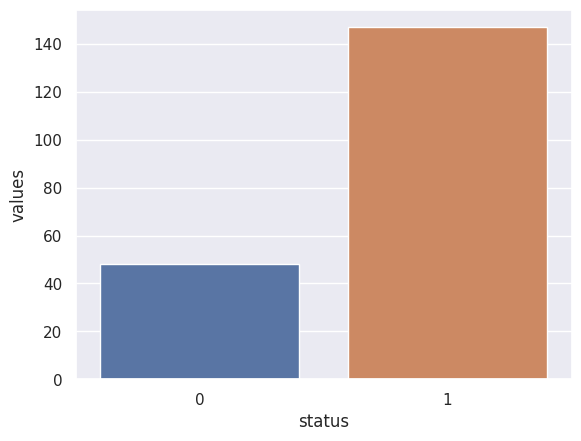

In [12]:
temp = df['status'].value_counts()
temp_df =pd.DataFrame({'status':temp.index,'values':temp.values})
print(sns.barplot(x='status',y='values',data=temp_df))

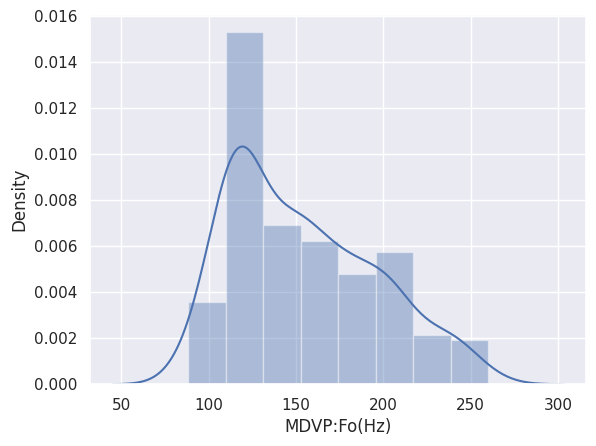

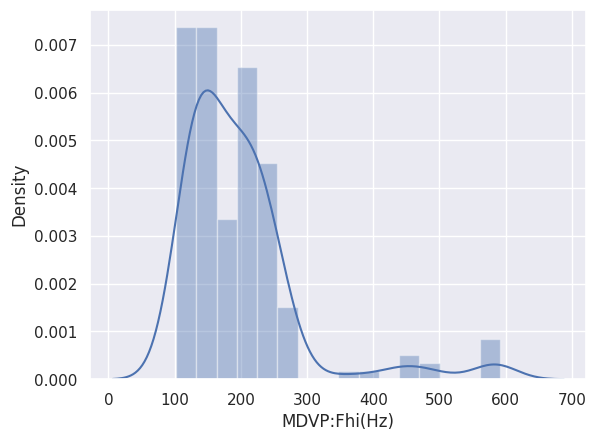

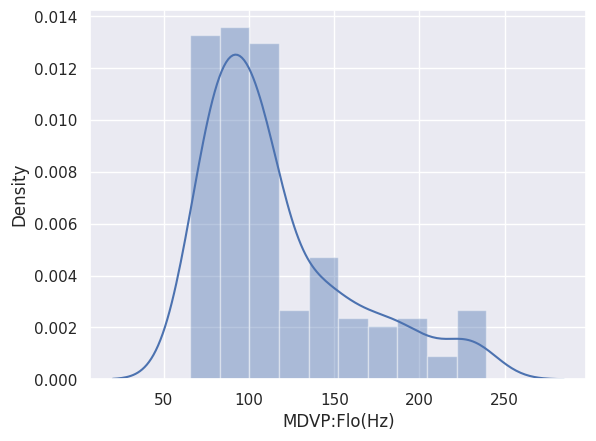

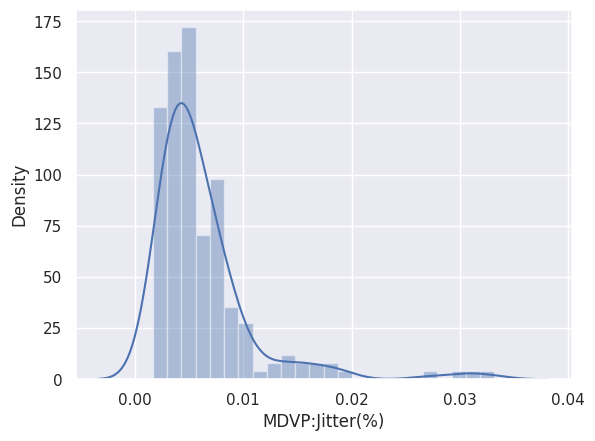

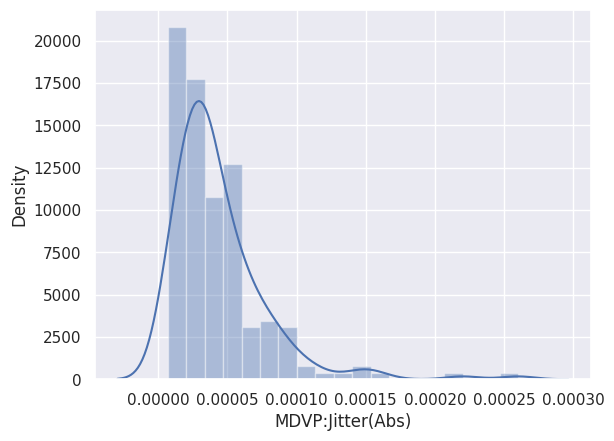

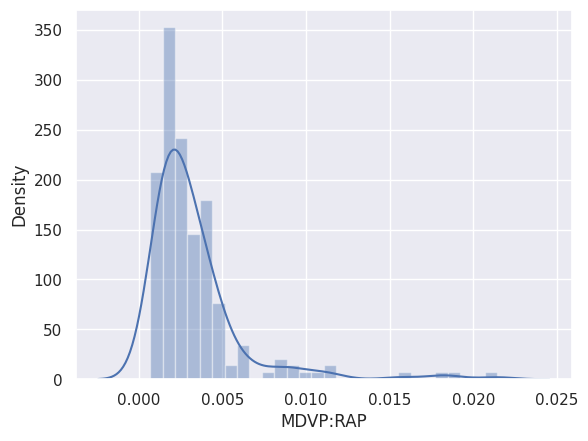

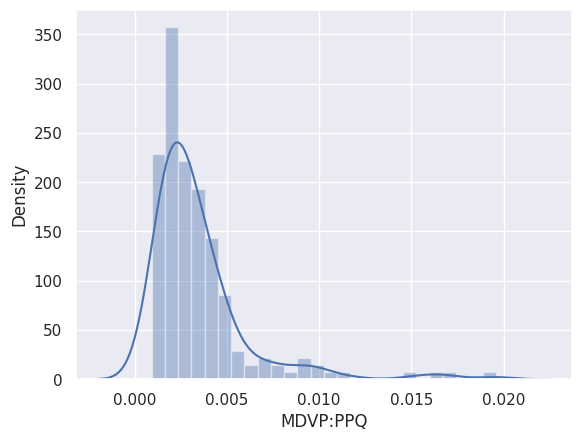

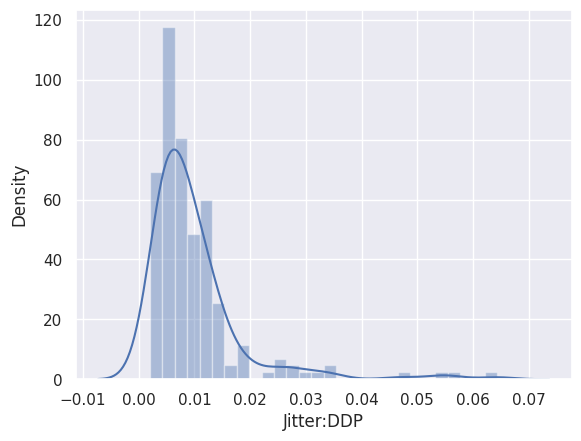

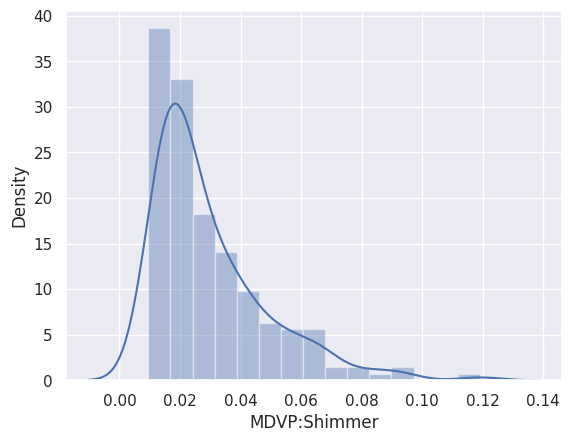

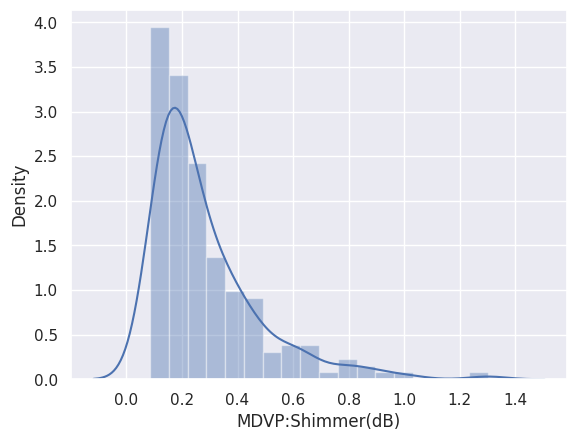

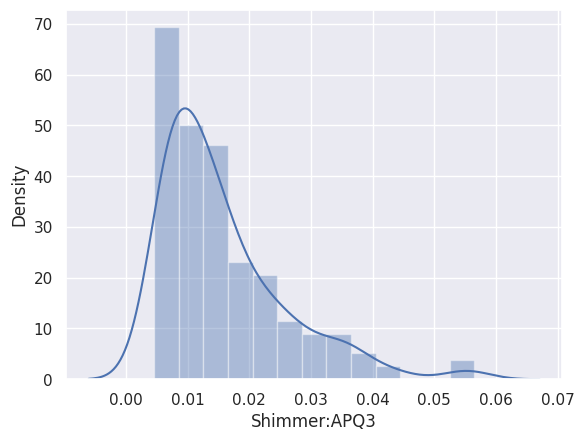

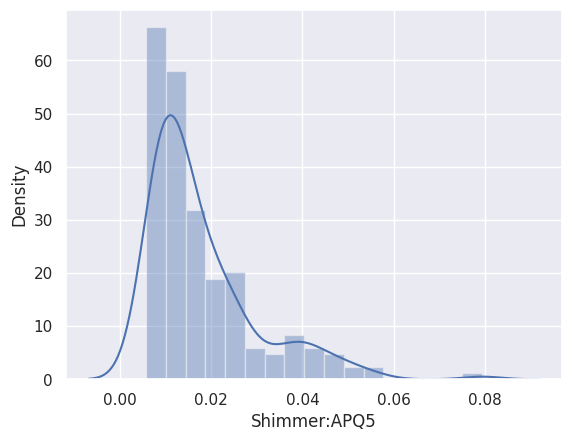

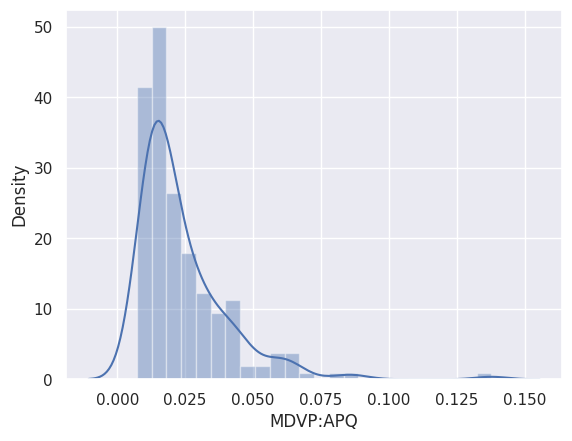

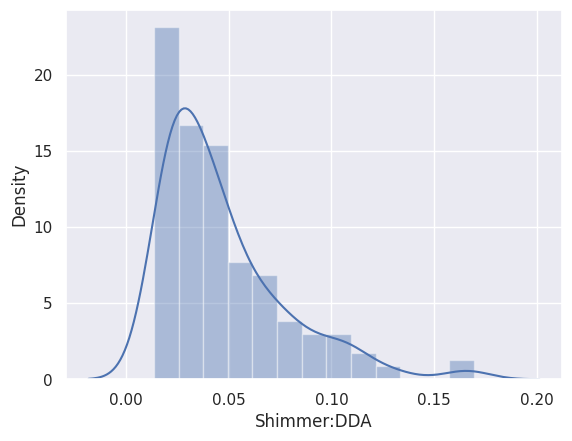

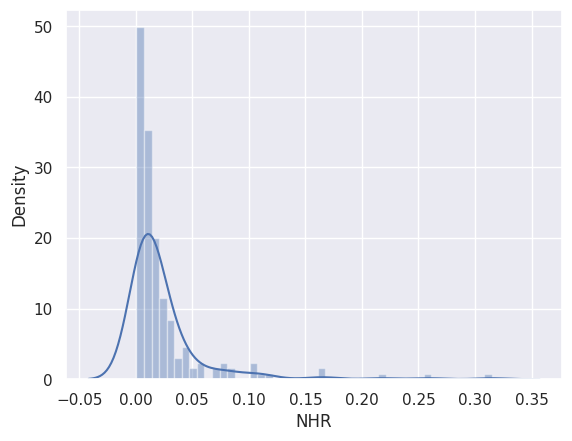

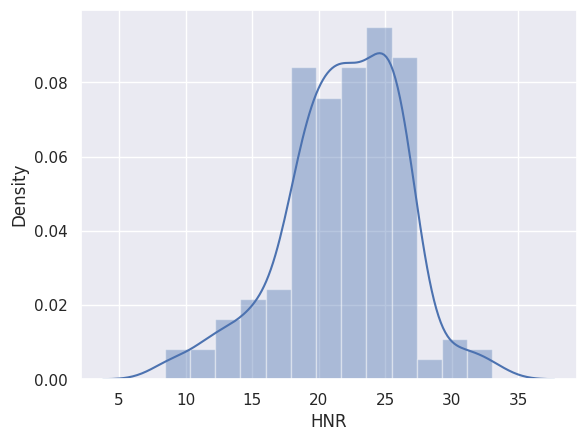

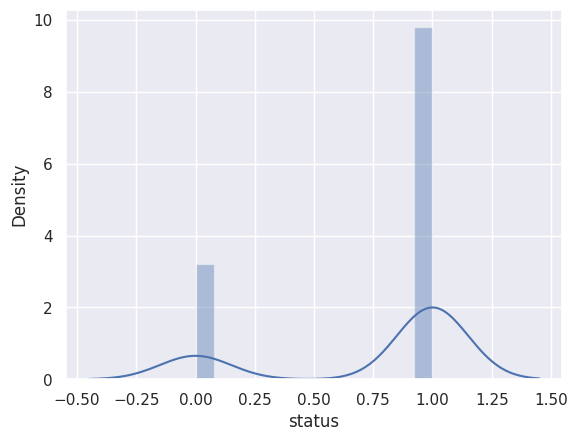

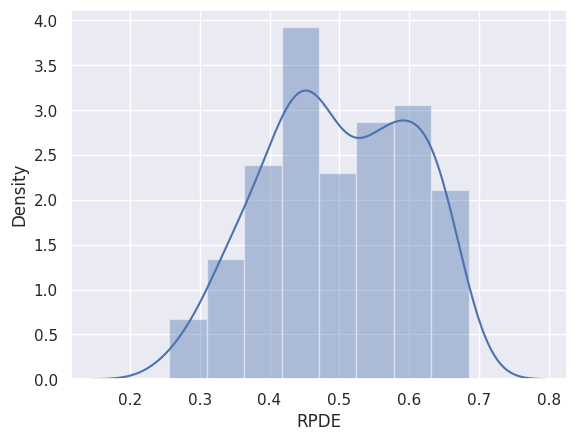

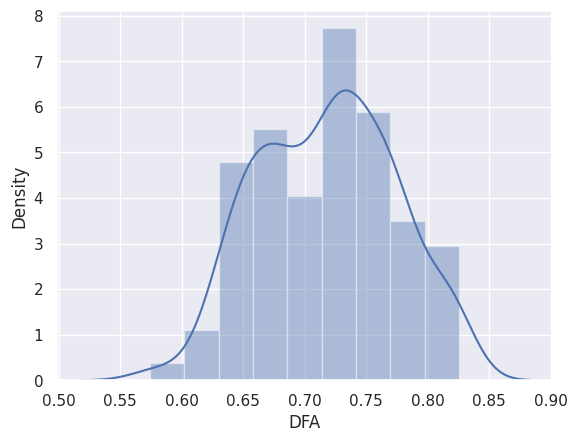

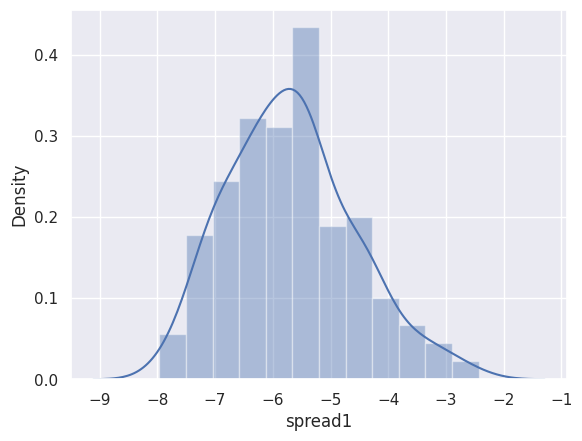

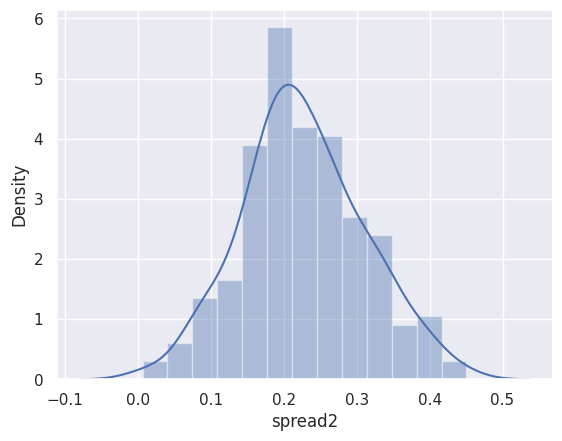

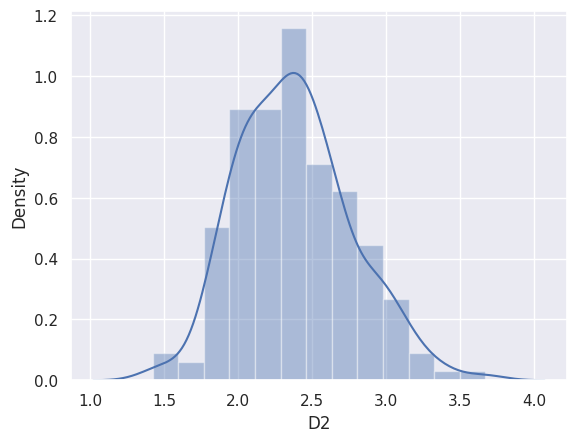

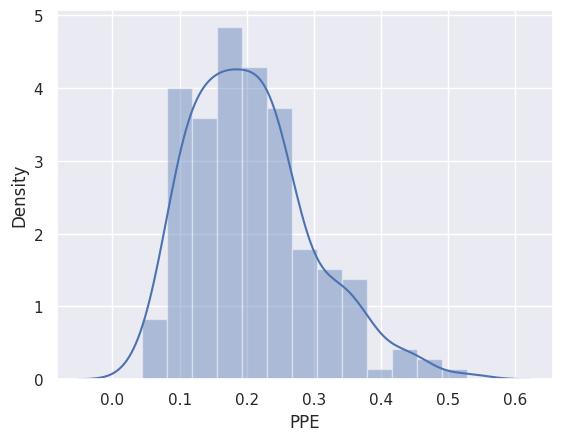

In [13]:
# Find Distribution about data

def distplots(col):
  sns.distplot(df[col])
  plt.show()

for i in list(df.columns)[1:]:
  distplots(i)

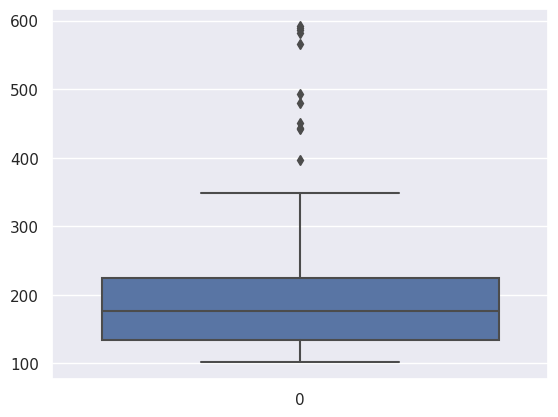

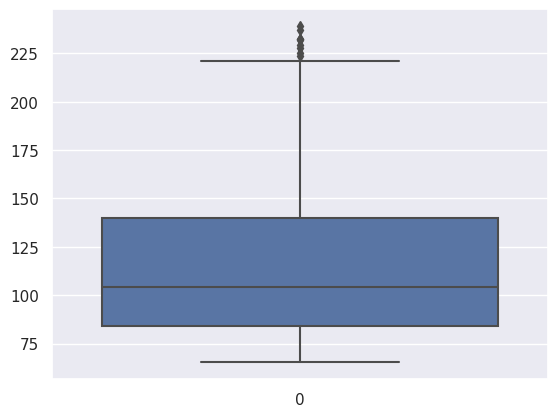

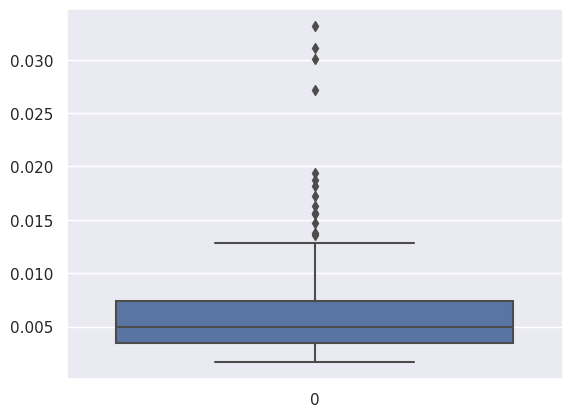

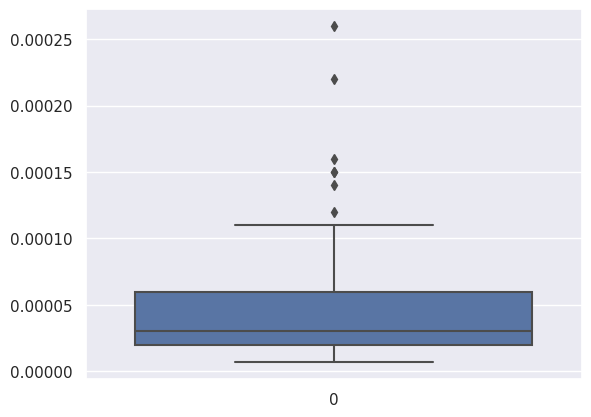

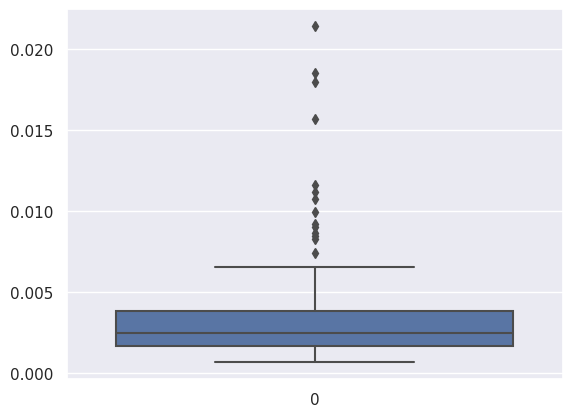

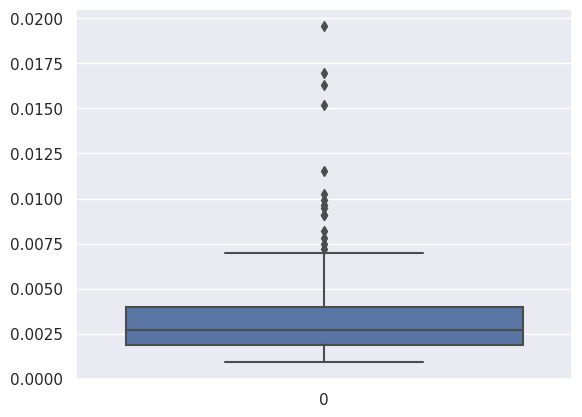

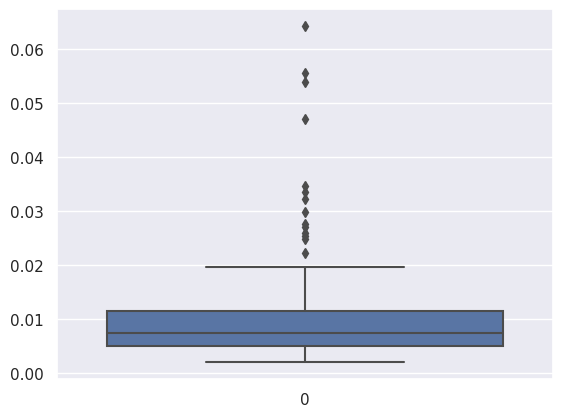

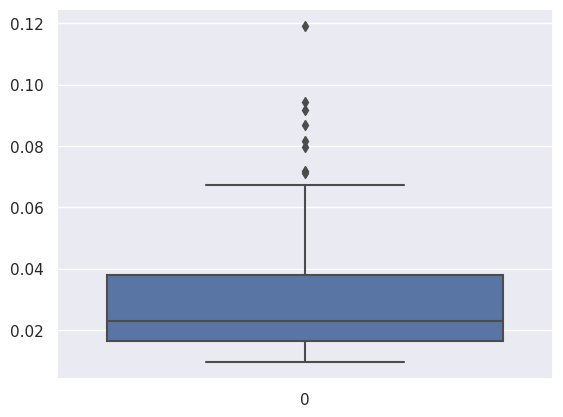

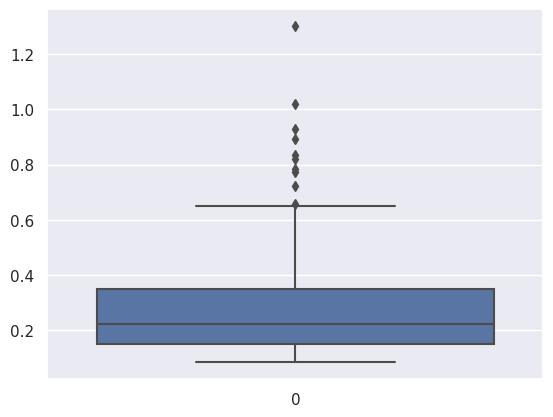

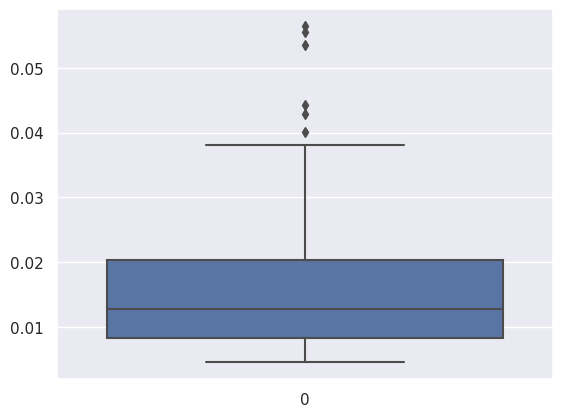

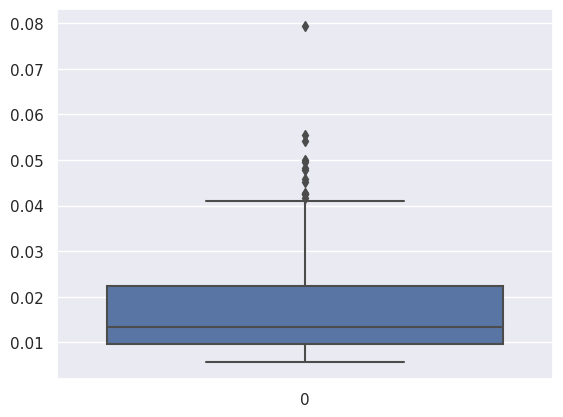

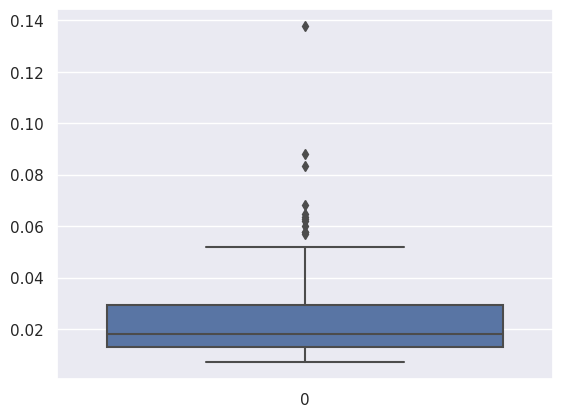

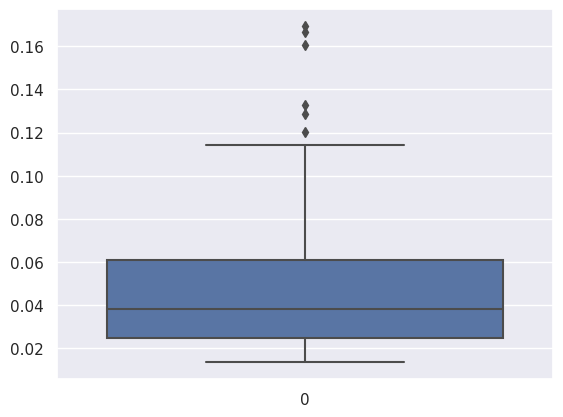

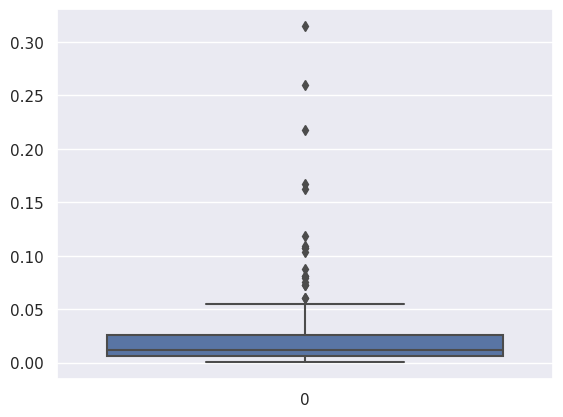

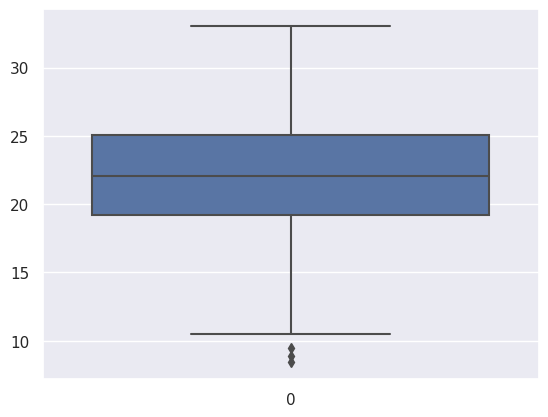

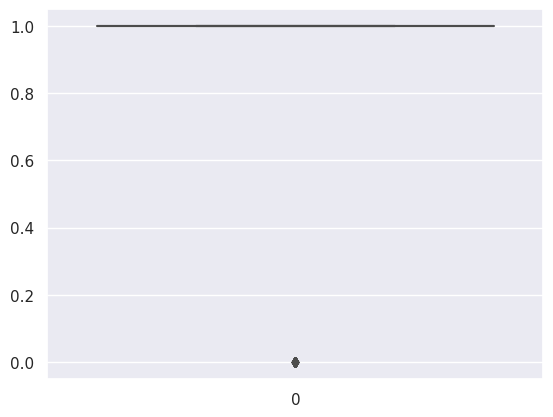

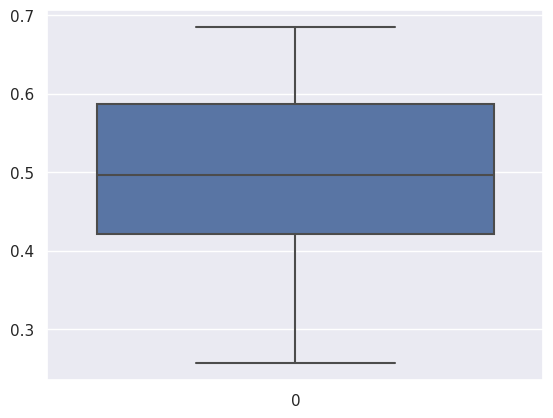

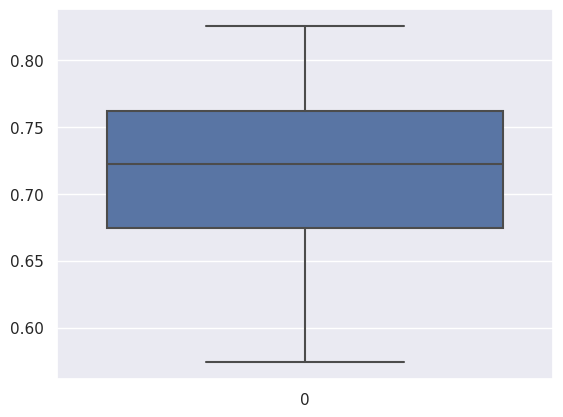

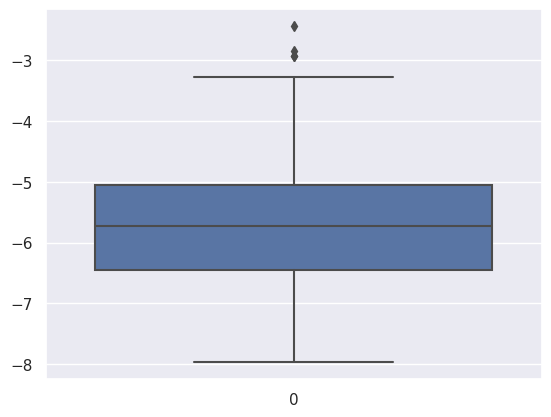

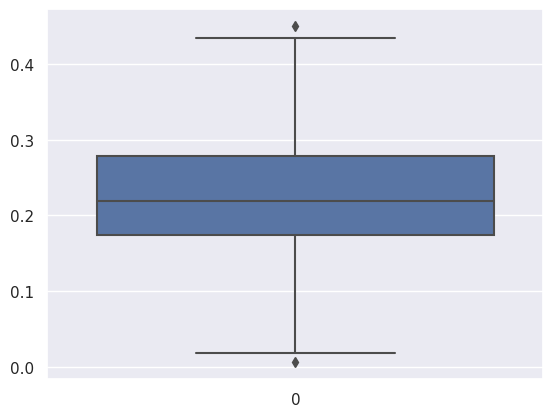

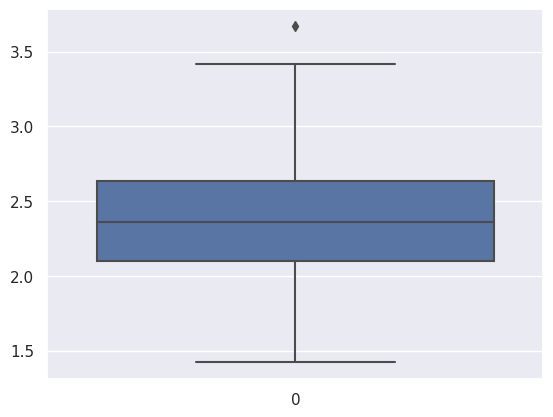

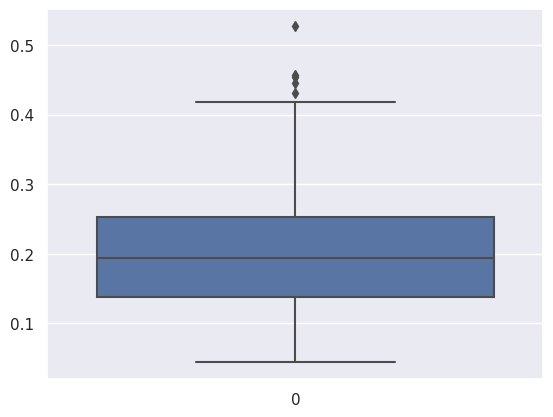

In [18]:
# Find the distribution of the data

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude=['object']))[1:]:
    boxplots(i)

In [19]:
# Advanced EDA- dtale


In [20]:
!pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 47.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 58.3 MB/s eta 0:00:00
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62566 sha256=5ce562c17d

In [21]:
import dtale
import dtale.app as dtale_app

In [22]:
dtale.show(df)

http://76b0db6c7171:40000/dtale/main/1

In [25]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=52e86e7b99e66dc9cca5802c7ef8d9b00a8d58c59dae7f5d4f2da02f37930338
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.

In [26]:
# Pandas Profiling
# !pip install pandas-profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

2023-08-21 09:32:46,041 - INFO     - Pandas backend loaded 1.5.3
2023-08-21 09:32:46,052 - INFO     - Numpy backend loaded 1.23.5
2023-08-21 09:32:46,054 - INFO     - Pyspark backend NOT loaded
2023-08-21 09:32:46,058 - INFO     - Python backend loaded


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
df.duplicated().sum()

0

In [28]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [29]:
# split the data into ind and dv
x=df.drop(['name','status'],axis=1)
y =df[['status']]

In [30]:
x.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [31]:
y.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [32]:
y.value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [33]:
# Imbalance treatment required
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros,y_ros = ros.fit_resample(x,y)

In [34]:
pd.DataFrame(y_ros).value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [35]:
df.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

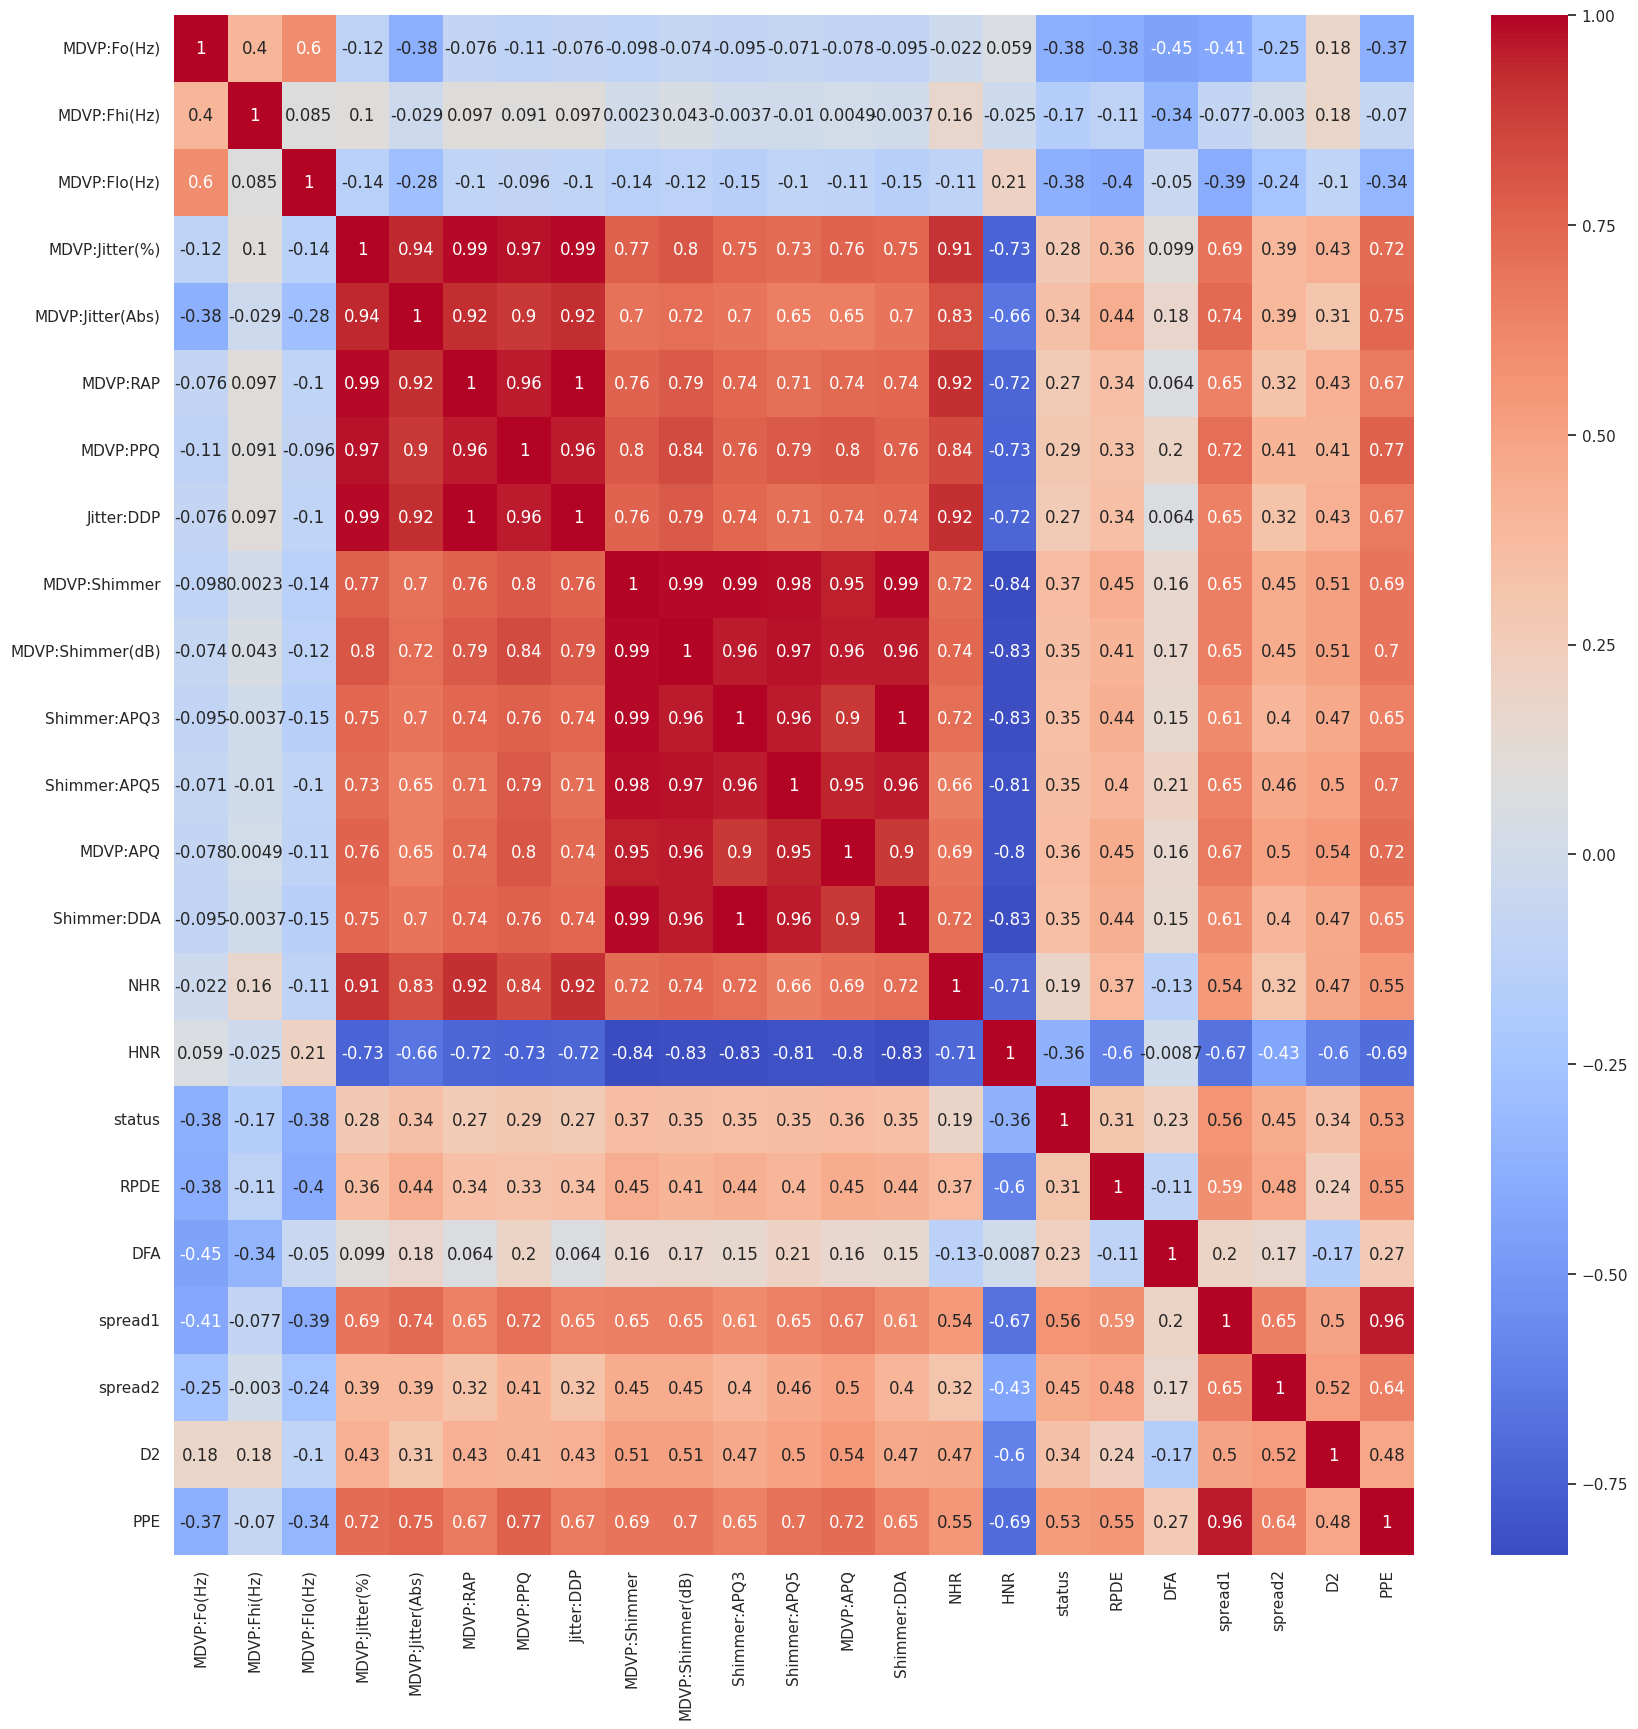

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [37]:
# Feature Scaling
sc=MinMaxScaler((-1,1))
x = sc.fit_transform(x_ros)
y = y_ros

In [38]:
pd.DataFrame(x).shape

(294, 22)

In [39]:
# Principal Component analysis

from sklearn.decomposition import PCA

pca = PCA(0.95)
x_pca = pca.fit_transform(x)

print(pd.DataFrame(x).shape)
print(x_pca.shape)

(294, 22)
(294, 8)


## Splitting the data into train and test

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=101)

# RandomForest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [77]:
y_pred_train =rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [78]:
# Evaluate
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [79]:
print(confusion_matrix(y_train,y_pred_train))
print()
print(confusion_matrix(y_test,y_pred_test))

[[114   0]
 [  0 121]]

[[32  1]
 [ 3 23]]


In [80]:

print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       121

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235


              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.96      0.88      0.92        26

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



In [81]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

1.0

0.9322033898305084


In [82]:
# Cross validation method

from sklearn.model_selection import cross_val_score
train_acc = cross_val_score(rf,x_train,y_train,cv=10)
test_acc = cross_val_score(rf,x_test,y_test,cv=10)

print("Train Mean Accuracy", train_acc.mean())
print("***********************************")

print("Test Mean Accuracy", test_acc.mean())


Train Mean Accuracy 0.9657608695652176
***********************************
Test Mean Accuracy 0.93


XGBoosting

In [83]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [84]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [85]:
print(classification_report(y_train, y_pred_train_xgb))
print()
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       121

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235


              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.96      0.88      0.92        26

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



In [86]:
print(accuracy_score(y_train, y_pred_train_xgb))
print()
print(accuracy_score(y_test, y_pred_test_xgb))

1.0

0.9322033898305084


In [87]:
# cross validation method
from sklearn.model_selection import cross_val_score
train_acc = cross_val_score(xgb, x_train, y_train, cv=10)
test_acc = cross_val_score(xgb, x_test, y_test, cv=10)


print("Train Mean Accuracy", train_acc.mean())
print("***********************************")

print("Test Mean Accuracy", test_acc.mean())

Train Mean Accuracy 0.9657608695652173
***********************************
Test Mean Accuracy 0.8800000000000001


Bagging deals with the overfitting Problem (High varaiance)while boosting deals with underfitting (High Bias)problem in the datasets very well.